In [1]:
def preprocess(file_name):
    with open(file_name) as f:
        d = json.load(f)
    data = json_normalize(d['summaries'])

    get_names = lambda x: [i['name'] for i in x if i['name'] is not ""] if len(x) else []
    data['architectures'] = data['architectures'].map(get_names)
    data['architectures'] = data['architectures'].apply(sorted)
    data['num_archs'] = data['architectures'].map(len)

    data['architectures'] = data['architectures'].map(lambda x: ", ".join(x))
    data = data.drop(['certification_status', 'id',
                      'filter_type', 'logo_url.large',
                      'logo_url.small', 'popularity',
                      'publisher.id', 'name', 'publisher.name', 'type'], axis=1)
    labels_as_list = lambda x: ", ".join(i['label'] for i in x if i['label'] is not "") if \
        len(x) else None
    data['operating_systems'] = data['operating_systems'].map(labels_as_list)

    # def to_numbers(x):
    #     no_plus = str(x)[:-1] if "+" in str(x) else x
    #     print(no_plus)
    #     print(x)
    #     no_plus = no_plus.strip()
    #     number, suffix = float(no_plus[:-1]), no_plus[-1]
    #
    #     if suffix is "K":
    #         return number * 1000
    #     elif suffix is "M":
    #         return number * 1000000
    #     else:
    #         return number
    # data['pull_count'] = data['pull_count'].map(to_numbers)
    data['pull_count'] = data['pull_count'].map(lambda x: str(x)[:-1] if "+" in str(x) else str(x))
    data['pull_count'] = data['pull_count'].map(
        lambda x: float(x[:-1]) * 1000 if x[-1] is "K" else\
        float(x[:-1]) * 1000000 if x[-1] is "M" else float(x))

    # data['categories_exists'] = data['categories'].map(lambda x: 1 if x else 0)
    data['category_count'] = data['categories'].map(lambda x: len(x) if x else 0)
    data = data.drop(['categories'], axis=1)
    data.set_index('slug')
    return data

In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [3]:
DATA_DIR = "../data/recent-data/"
import os
files = sorted(os.listdir(DATA_DIR), reverse=True)
# for i in range(len(files) - 1):
file_1 = os.path.join(DATA_DIR, files[0])
file_2 = os.path.join(DATA_DIR, files[1])
print(file_1, file_2)
df1, df2 = preprocess(file_1), preprocess(file_2)

../data/recent-data/recent_30-04__20.json ../data/recent-data/recent_30-04__16.json


In [4]:
merged = pd.merge(df1[['slug', 'pull_count']], df2[['slug', 'pull_count']], on='slug')

In [5]:
df1.loc[df1['slug'] == 'kaazing-gateway']

,architectures,created_at,operating_systems,pull_count,short_description,slug,source,star_count,updated_at,num_archs,category_count
276,"amd64, arm64",2016-06-16T00:00:00Z,Linux,NaN,Official build of Kaazing Gateway.,kaazing-gateway,store,0,2019-04-30T19:06:49.146955Z,2,1


In [6]:
merged.loc[merged['pull_count_x'] != merged['pull_count_y']]

,slug,pull_count_x,pull_count_y
0,liquidweb/php-fpm_exporter,7.0,1.0
1,jgoerzen/home-assistant,226.0,222.0
4,cadster/home-assistant-docker,219.0,215.0
6,decinho13/base-notebook,849.0,811.0
8,ascensive/irc-rss-feed-bot,643.0,639.0
9,sanfamite/home-assistant-mychevy,540.0,536.0
10,mooseh81/homeassistant,5700.0,5600.0
15,nwykes/home-assistant-docker,218.0,214.0
17,rooster791/docker-hass,585.0,578.0
18,pschmitt/hass-slave,736.0,732.0


In [7]:
file_3 = os.path.join(DATA_DIR, files[2])

In [8]:
df3 = preprocess(file_3)

In [11]:
merged_1 = merged.merge(df3[['slug', 'pull_count']], on='slug')

In [13]:
merged_1

,slug,pull_count_x,pull_count_y,pull_count
0,gatsbyjs/gatsby-dev-builds,7000.0,7000.0,7000.0
1,topdockercat/minio-unraid,50000.0,50000.0,50000.0
2,decinho13/base-notebook,849.0,811.0,780.0
3,cloyne/blog,5500.0,5500.0,5500.0
4,opensuse/portus,1000000.0,1000000.0,1000000.0
5,prestashop/prestashop-git,10000.0,10000.0,10000.0
6,cloyne/owncloud,4900.0,4900.0,4900.0
7,moneymanagerex/mmex_build_env,50000.0,50000.0,50000.0
8,tgstation/tgstation,10000.0,10000.0,10000.0
9,apache/airflow,10000.0,10000.0,10000.0


In [12]:
file_3 = os.path.join(DATA_DIR, files[3])
df3 = preprocess(file_3)
merged_1.merge(df3[['slug', 'pull_count']], on='slug')

,slug,pull_count_x,pull_count_y,pull_count_x,pull_count_y
0,gatsbyjs/gatsby-dev-builds,7000.0,7000.0,7000.0,7000.0
1,cloyne/blog,5500.0,5500.0,5500.0,5500.0
2,opensuse/portus,1000000.0,1000000.0,1000000.0,1000000.0
3,cloyne/owncloud,4900.0,4900.0,4900.0,4900.0
4,moneymanagerex/mmex_build_env,50000.0,50000.0,50000.0,50000.0
5,apache/airflow,10000.0,10000.0,10000.0,10000.0
6,jjmerelo/perl6-doc,1800.0,1800.0,1800.0,1800.0
7,cloyne/wordpress,10000.0,10000.0,10000.0,10000.0
8,alpeware/chrome-headless-trunk,5000000.0,5000000.0,5000000.0,5000000.0
9,awwashere/buretoolbox,687.0,680.0,675.0,671.0


In [74]:

file_1 = os.path.join(DATA_DIR, files[0])
df1 = preprocess(file_1)[['slug', 'pull_count']]

for i in range(len(files) - 1):
    file_2 = os.path.join(DATA_DIR, files[i + 1])
    df2 =  preprocess(file_2)
    df1 = df1.merge(df2[['slug', 'pull_count']], how='outer', on='slug')
#     print(df1.head())
    

In [75]:
df1

,slug,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,...,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y
0,cacciald/mocker-python,623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dronemapper/node-micmac,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN
2,webdollar/node,2700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2700.0,NaN,NaN,NaN,2700.0
3,ctftraining/october_2019_twice_sqli,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,liquidweb/php-fpm_exporter,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,jgoerzen/home-assistant,226.0,222.0,NaN,219.0,218.0,216.0,213.0,211.0,NaN,...,269.0,261.0,254.0,248.0,235.0,234.0,234.0,234.0,234.0,232.0
6,liuchong/rustup,50000.0,NaN,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,...,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,NaN,NaN,50000.0
7,gatsbyjs/gatsby-dev-builds,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,...,7100.0,7100.0,NaN,7100.0,7100.0,7100.0,NaN,7100.0,7100.0,7100.0
8,forumi0721alpinex64/alpine-x64-jenkins,1700.0,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1700.0,NaN,NaN,NaN,NaN,NaN
9,amcarrasco/foundation_flask,24.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,41.0,NaN,NaN,NaN,NaN


In [68]:
df1['change'] = (df1.iloc[:,1] - df1.iloc[:,-1])/df1.iloc[:,-1]
df1 = df1.drop(df1[df1['change'] <= 0].index)

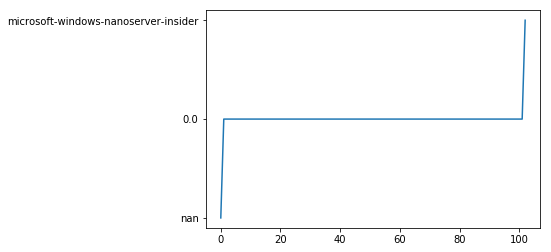

In [67]:
import matplotlib.pyplot as plt
plt.plot(list(df1.iloc[10])[::-1])

In [54]:
(df1.iloc[:,-1] - df1.iloc[:,1])/df1.iloc[:,-1]

0      6.000000
1      0.018018
2      0.000000
3      0.000000
4      0.018605
5      0.000000
6      0.046856
7      0.000000
8      0.006260
9      0.007463
10     0.017857
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.018692
16     0.000000
17     0.012111
18     0.005464
19     0.000000
20     0.010843
21     0.000000
22     0.000000
23     0.020942
24     0.000000
25     0.090909
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
390    0.000000
391    0.500000
392    0.000000
393    0.000000
394    0.041667
395    1.000000
396    0.000000
397    0.009677
398    0.000000
399    3.000000
400    0.714286
401    0.000000
402    0.117647
403    0.067358
404    0.000000
405    0.000000
406    8.000000
407    0.000000
408    1.250000
409    0.000000
410    0.078431
411    0.000000
412    0.000000
413    0.000000
414    0.207792
415    0.000000
416    0.000000
417    0.011236
418    6.000000
419    0.022556
Length: 420, dtype: floa

In [62]:
df1

,slug,pull_count_x,pull_count_y,change,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,...,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count_x,pull_count_y,pull_count
0,kaazing-gateway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aerospike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,microsoft-windowscamerateam-onnxconverter,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,microsoft-windows-base-os-images,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,microsoft-windows-servercore-insider,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,microsoft-windows-servercore,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,microsoft-windows-nanoserver-insider,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,microsoft-windows-nanoserver,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,microsoft-windows-iotcore-insider,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,microsoft-windows-iotcore,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
